# Statistical Analysis - III

## Nonparametric Statistical Hypothesis Tests

Nonparametric statistics are those methods that do not assume a specific distribution to the data.

Often, they refer to statistical methods that do not assume a Gaussian distribution.

* The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.
* The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.
* The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.

## 1. Mann-Whitney U test

The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

For the test to be effective, it requires at least 20 observations in each data sample.

* Fail to Reject H0: Sample distributions are equal.
* Reject H0: Sample distributions are not equal.

In [4]:
import pandas as pd

data=pd.read_csv("[W7-ex3] sample_data_pooh_piglet.csv")
data.shape

(20, 2)

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 10

In [6]:
pooh=data[data['Speaker'] == 'Pooh']
piglet=data[data['Speaker'] == 'Piglet']

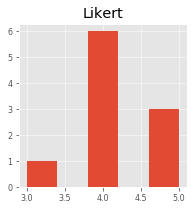

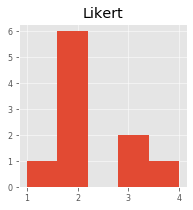

In [7]:
pooh.hist(figsize=(3, 3), bins=5, xlabelsize=8, ylabelsize=8);
piglet.hist(figsize=(3, 3), bins=5, xlabelsize=8, ylabelsize=8);

In [8]:
from scipy.stats import shapiro

print(shapiro(pooh.Likert))
print(shapiro(piglet.Likert))

(0.794063925743103, 0.01227869838476181)
(0.840621829032898, 0.04488762468099594)


In [9]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(pooh.Likert, piglet.Likert)
print('Statistics=%.5f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=5.00000, p=0.00024
Different distribution (reject H0)


samples are not normally distributed

## 2. Wilcoxon Signed-Rank Test

If the two samples are not independent, the Wilcoxon signed-rank test is used, also called the Wilcoxon T test, named for Frank Wilcoxon. It is the equivalent of the paired Student T-test, but for ranked data instead of real valued data with a Gaussian distribution.

For the test to be effective, it requires at least 20 observations in each data sample.

* Fail to Reject H0: Sample distributions are equal.
* Reject H0: Sample distributions are not equal.

In [10]:
import pandas as pd

df = pd.read_csv("[W7-ex3] sample_data_blood_pressure.csv")
print(df.shape)

(120, 5)


In [11]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [12]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [13]:
from scipy.stats import shapiro

print(shapiro(df['bp_before']))
print(shapiro(df['bp_after']))

(0.9547787308692932, 0.0004928423441015184)
(0.9740639328956604, 0.020227791741490364)


In [14]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

stat, p = wilcoxon(df['bp_before'], df['bp_after'])
print('Statistics=%.5f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=2234.50000, p=0.00141
Different distribution (reject H0)


samples are not normally distributed.

## 3. Kruskal-Wallis Test

The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test or ANOVA for short. It is named for the developers of the method, William Kruskal and Wilson Wallis. This test can be used to determine whether more than two independent samples have a different distribution. It can be thought of as the generalization of the Mann-Whitney U test.

Each data sample must be independent, have 5 or more observations, and the data samples can differ in size.

* Fail to Reject H0: All sample distributions are equal.
* Reject H0: One or more sample distributions are not equal.

In [15]:
# three datasets
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

In [16]:
from scipy.stats import shapiro

print(shapiro(data1))
print(shapiro(data2))
print(shapiro(data3))

(0.8951009511947632, 0.19340917468070984)
(0.8835868239402771, 0.14343352615833282)
(0.9343484044075012, 0.4919976592063904)


In [17]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal

# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.854, p=0.652
Same distributions (fail to reject H0)


* It is okay to run nonparametric tests over normally distributed data, but it is more powerful to use paramatric tests (e.g., t-test, ANOVA) for such data.
* We will use kruskal-Wallis just for testing

### 3.2 Example (Kruskal-Wallis with Post-hoc analysis)

In [19]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal

# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=8.188, p=0.017
Different distributions (reject H0)


### Kruskal-Wallis Test Post-hoc analysis

* For post-hoc analysis, Dunn's test is used.
* Dunn's test preserves a pooled variance for the tests implied by the Kruskal-Wallis null hypothesis.

* You need to install scikit-posthoc package.
* run !pip install scikit-posthocs

In [20]:
!pip install scikit-posthocs

In [21]:
import scikit_posthocs as sp
sp.posthoc_dunn([data1, data2, data3], p_adjust = 'holm')

,1,2,3
1,-1.000000,0.936330,0.035493
2,0.936330,-1.000000,0.035493
3,0.035493,0.035493,-1.000000


Results¶
* data1 and data2 are not significantly different (p=0.512).
* data1 and data3 are significantly different (p=0.001).
* data2 and data3 are significantly different (p=0.006).

References (KOR)
* https://dermabae.tistory.com/169?category=464464